<a href="https://colab.research.google.com/github/CHOISEONGGU/MachineLearning_ChoiSG/blob/main/MachineLearning_ChoiSG/%EA%B3%B5%EB%B6%80%EC%9E%90%EB%A3%8C/ch07_ML_01_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_ChoiSG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

보험료 예측하기

In [1]:
#필요한 라이브러리 불러오기
import pandas as pd

In [66]:
# https://www.kaggle.com/
# 1. 직접적으로 파일 경로
# 2. 외부의 링크를 전달 받아서
df = pd.read_csv('https://github.com/BigData23th/Data/raw/main/insurance.csv')


In [5]:
# df을 불러오면 4개를 해봐야합니다
# df.head, df.tail, df.info, df.describe
df.head()
# age : 나이, sex: 성별, bmi, children: 자녀수, region: 지역,(관측값, 독립변수) expenses : 보험료
# 보험료 -> expenses : 종속변수, 목표변수(타겟변수), 예측값
# 1. 변수들의 묶음 (관측) -> 대상(정답값)을 예측 -> 목표, 타겟
# 2. 독립변수(X) -> 종속변수(y)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe() # 연속형 변수에 대한 통계치

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
# df.describe(include='O')
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [11]:
# 소수점 2자리 표시
pd.options.display.float_format = "{:.2f}".format

In [12]:
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


In [13]:
# df.describe(include="object")
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#개인학습 문제

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

<Axes: xlabel='age', ylabel='Count'>

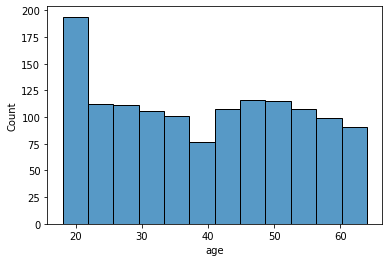

In [27]:
# 1.연령별
sns.histplot(data=df, x='age')

<Axes: xlabel='expenses', ylabel='Count'>

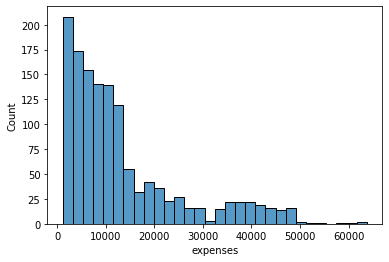

In [28]:
# 2. 보험료별 히스토그램
sns.histplot(data=df, x='expenses')

<Axes: xlabel='sex', ylabel='expenses'>

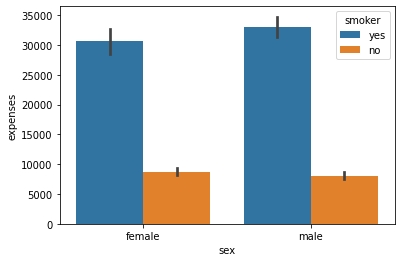

In [29]:
# 3.보혐료 막대그래프(성별)
sns.barplot(data=df, x='sex', y='expenses', hue='smoker')

## 데이터 전처리(pre-processing)
* 데이터를 모델링할 수 있게 다듬는 과정
1. 하지 않으면 모델링 자체가 안되는 전처리
1. 모델의 성능을 높이기 위한 전처리

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # 생성자 역할
# 모델을 통해서 학습을 시켜주려면 X(독립변수들)에 있는 값들이 모두 숫자형태여야함
# 독립변수들(X) => 2개 이상의 열을 가진 df
X = df.drop('expenses', axis=1)  # 예측 대상을 제거
# 종속변수(y) => 1개 Series
y = df['expenses']

model.fit(X, y)   # 훈련, object형이 있으면 훈련이 불가한다. 모두 다 숫자형태(int, float)형태로 있어야 가능하다.
# object로 표현되어 있는 범주형 변수들이 버그를 일으킴, 모두 다 숫자형태(int, float)형태로 있어야 가능하다.

ValueError: ignored

#범주형 데이터 처리

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [37]:
# 고유값, 빈도
# df.smoker.unique(), df.smoker.nunique()
df.smoker.value_counts()   # yes = 1, no = 0 으로 두려고 한다.

no     1064
yes     274
Name: smoker, dtype: int64

In [39]:
# yes : 1, no : 0 # Bool T/F (1/0)
df.smoker.map({'yes' : 1, 'no' : 0})

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [41]:
# df.smoker.apply(lambda x : x == 'yes')
df.smoker.apply(lambda x : x == 'yes').apply(int)   # 메소드 체이닝

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [42]:
df.smoker.apply(lambda x : int(x == 'yes'))

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [45]:
# df.smoker == 'yes'
# (df.smoker == 'yes') + 0
(df.smoker == 'yes') * 1

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [55]:
# equal : 동일 여부를 연산
# mul : multply / add : add
# df.smoker.eq('yes').mul(1)
df.smoker.eq('yes').add(0)

0       0
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    0
Name: smoker, Length: 1338, dtype: int64

In [70]:
df.smoker = df.smoker.eq('yes').mul(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   expenses          1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


### 범주형 데이터 처리 / 더미 변수 (원-핫 인코딩)
* sex : `is_male` ? / `is_female`?
* region : `ne`, `nw`, `se`, `sw` (0, 1, 1...)

In [67]:
# pd.get_dummies(df, columns=[내가 변환시키고 싶은 칼럼 이름들])
pd.get_dummies(df, columns=['sex','region'])
# n개의 고윳값 -> n-1열
# 열 -> 계산을 많이해줘야함

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,yes,16884.92,1,0,0,0,0,1
1,18,33.80,1,no,1725.55,0,1,0,0,1,0
2,28,33.00,3,no,4449.46,0,1,0,0,1,0
3,33,22.70,0,no,21984.47,0,1,0,1,0,0
4,32,28.90,0,no,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,no,10600.55,0,1,0,1,0,0
1334,18,31.90,0,no,2205.98,1,0,1,0,0,0
1335,18,36.90,0,no,1629.83,1,0,0,0,1,0
1336,21,25.80,0,no,2007.95,1,0,0,0,0,1


In [62]:
# 필요없는 고윳값에 따른 열 1개씩을 삭제
# n개의 고윳값 -> n-1열
pd.get_dummies(df, columns=['sex','region'], drop_first=True)   # 가장 첫번째 고유값(열)을 삭제
# sex -> 2 -> 1, region -> 4 -> 3

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [68]:
df2 = df.copy()
df = pd.get_dummies(df, columns=['sex','region'], drop_first=True)   # columns=[] 리스트로 묶어줘야한다
df

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,yes,16884.92,0,0,0,1
1,18,33.80,1,no,1725.55,1,0,1,0
2,28,33.00,3,no,4449.46,1,0,1,0
3,33,22.70,0,no,21984.47,1,1,0,0
4,32,28.90,0,no,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,no,10600.55,1,1,0,0
1334,18,31.90,0,no,2205.98,0,0,0,0
1335,18,36.90,0,no,1629.83,0,0,1,0
1336,21,25.80,0,no,2007.95,0,0,0,1


### 훈련셋 / 시험셋 나누기
* 데이터를 넣어서 모델을 학습시킨 다음에 해당 모델을 가지고 새로운 값을 넣어서 결과를 받아내는 프로그램
* 기존에 학습에 쓰인 데이터 X / 새로운 데이터를 넣어서 검증을 해줘야함
* 100개의 데이터가 있다 -> `70~80`개는 학습에 쓰고, `20~30`개 정도는 검증을 위한 (시험을 위한) 데이터 셋으로 남겨놓음
---
모델링 -> 데이터 분할 작업
1. 종속변수(y)와 독립변수(X)를 분리
    * 독립변수 -> (영향) -> 종속변수
2. 학습셋/훈련셋(train set)과 시험셋(test set) 분리
    * 학습의 결과에 대한 신뢰성, 정확성을 검증

||독립변수|종속변수|
|-|-|-|
|학습셋|X_train|y_train|
|시험셋|X_test|y_test|


### 독립변수와 종속변수
* **독립변수**
    * 예측에 사용되는 재료와 같은 변수들
    * 피쳐 (Feature), 피쳐 변수 (Feature Variable)
* **종속변수**
    * 예측의 대상이 되는 변수
    * 목표 변수, 타깃, 타깃 변수 (Target Variable)

> '지도 학습'에 속하는 모델들은 독립변수를 통해 종속변수를 예측하는 것이므로, 어떤 변수가 종속변수인지 명확하게 알려줘야함 -> 독립변수와 종속변수를 각각 별도의 데이터로 입력 받게 됨 (`model.fit(X:독립변수df, y:종속변수s)`)

### 학습(훈련)셋과 시험셋
> 학습셋과 시험셋을 구분하지 않고 예측 모델을 만들 경우 새로운 데이터에 대한 예측력을 검증할 수 X (기출문제를 학습시키고 다시 그 문제로 시험을 보는 것)
* 전체 데이터를 가지고 모델링(학습)을 하고, 또다시 전체 데이터에 대해서 예측값을 만들어서 종속변수와 비교 -> 특정 데이터에 대해 **과최적** 되어 있을 수 있음
* 시험셋을 통해 검증하지 않은 상태에서는 불확실성이 존재
* 일반적으로는 **학습셋:시험셋**을 각각 7:3, 8:2 정도로 나눔
* 만약 데이터가 너무 적다? -> 학습셋을 우선시 (데이터가 적다면 9:1도 가능...)

In [71]:
df # y : expenses <- / X : 독립변수

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [73]:
# 독립변수(들) -> 예측의 대상으로 삼을 종속변수(expenses)를 제외하고 모델링을 통한 예측에 사용할 관측값들.
X = df.drop('expenses', axis=1) # 독립변수들, 관측변수, feature 변수
# 종속변수 -> (머신러닝 모델을 통한) 예측의 대상이 되는(독립변수들의 변화에 따라 값의 변화가 '종속'이 되는) 예측값
y = df['expenses'] # 목표변수/타깃변수/종속변수
X, y

(      age   bmi  children  smoker  sex_male  region_northwest  \
 0      19 27.90         0       1         0                 0   
 1      18 33.80         1       0         1                 0   
 2      28 33.00         3       0         1                 0   
 3      33 22.70         0       0         1                 1   
 4      32 28.90         0       0         1                 1   
 ...   ...   ...       ...     ...       ...               ...   
 1333   50 31.00         3       0         1                 1   
 1334   18 31.90         0       0         0                 0   
 1335   18 36.90         0       0         0                 0   
 1336   21 25.80         0       0         0                 0   
 1337   61 29.10         0       1         0                 1   
 
       region_southeast  region_southwest  
 0                    0                 1  
 1                    1                 0  
 2                    1                 0  
 3                    0       

In [74]:
# 훈련셋 / 시험셋
from sklearn.model_selection import train_test_split  # 훈련 / 시험 나눠주겠다.

In [76]:
# train_test_split(X: 독립변수들, y:종속변수, test_size=시험셋의 비율, random_state=랜덤값 기준)
# test_size : 전체 비율이 1이라고 했을 때, test set의 사이즈 (0.2~0.3)
# random_state : numpy.random.seed() -> 똑같은 값이 나와줄 수 있도록 기준을 잡아줌
# train_test_split(X, y) -> 4개 (1. X 훈련셋, 2. X 시험셋, 3. y 훈련셋 4. y 시험셋)
train_test_split(X, y, test_size=0.2, random_state=20)
 # 독립변수_훈련셋, 독립변수_시험셋, 종속변수_훈련셋, 종속변수_시험셋

[      age   bmi  children  smoker  sex_male  region_northwest  \
 1204   18 27.30         3       1         0                 0   
 829    39 21.90         1       0         1                 1   
 1077   21 26.00         0       0         1                 0   
 416    52 34.10         0       0         1                 0   
 1295   20 22.00         1       0         1                 0   
 ...   ...   ...       ...     ...       ...               ...   
 1242   22 21.30         3       0         0                 1   
 924    43 23.20         0       0         1                 0   
 1247   33 29.40         4       0         1                 0   
 271    50 34.20         2       1         1                 0   
 474    54 25.10         3       1         1                 0   
 
       region_southeast  region_southwest  
 1204                 1                 0  
 829                  0                 0  
 1077                 0                 0  
 416                  1       

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_test, y_train, y_test   # 리스트언팩킹

(      age   bmi  children  smoker  sex_male  region_northwest  \
 1204   18 27.30         3       1         0                 0   
 829    39 21.90         1       0         1                 1   
 1077   21 26.00         0       0         1                 0   
 416    52 34.10         0       0         1                 0   
 1295   20 22.00         1       0         1                 0   
 ...   ...   ...       ...     ...       ...               ...   
 1242   22 21.30         3       0         0                 1   
 924    43 23.20         0       0         1                 0   
 1247   33 29.40         4       0         1                 0   
 271    50 34.20         2       1         1                 0   
 474    54 25.10         3       1         1                 0   
 
       region_southeast  region_southwest  
 1204                 1                 0  
 829                  0                 0  
 1077                 0                 0  
 416                  1       

In [78]:
len(df)

1338

In [80]:
# X(독립변수들) 훈련셋
X_train
# X(독립변수들) 시험셋
X_test
# y(종속변수) 훈련셋
y_train
# y(종속변수) 시험셋
y_test

698    10976.25
520    25656.58
1144    9630.40
908    15170.07
559     1646.43
         ...   
851    14119.62
109    47055.53
941     9549.57
600     1633.04
865     6600.36
Name: expenses, Length: 268, dtype: float64

## 모델 학습
> 모델링
* 머신러닝 알고리즘으로 모델을 학습시키는 과정 → 결과물 : 머신러닝 모델
* 모델링에 사용할 머신러닝 알고리즘을 선택
* 독립변수와 종속변수를 *fit()* 함수에 인수로 주어 학습

|알고리즘 선택| |모델 생성| |모델 학습| |모델을 사용한 예측|
|-|-|-|-|-|-|-|
|다양한 머신러닝<br>알고리즘 중 선택 후<br>라이브러리 임포트|→|모델링에 사용할<br>모델 생성|→|*fit()* 함수에 학습셋의<br>독립변수와 종속변수를<br>인수로 대입|→|train_test_split()<br>함수으로 생성된 평가셋의 <br>독립변수를 인수로 대입

In [81]:
# 선형(linear) 회귀 모델
from sklearn.linear_model import LinearRegression

In [82]:
# 선형회귀(LinearRegression) 클래스로 모델 생성
model = LinearRegression()

In [83]:
# X 시험셋을 input해서 y_train의 정답을 가지도록 훈련
# 모델 훈련 / 모델 학습
# model.fit(X, y)
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# predict : 새로운 데이터를 넣어줘서 예측
pred = model.predict(X_test)
pred

array([13305.67455264,  9983.61120982, 11682.24373697, 18032.37551645,
        4740.7997512 ,  2160.56101171,  2233.5955768 , 11876.07871136,
       38298.62237119, 11410.8874426 , 16413.05596838, 28913.81111067,
        3188.39711683, 13155.17824207, 29754.17957329,  9601.31355994,
       32026.67699072, 12212.36994892,  3029.03185148, 11062.07447431,
       38973.20445002,  8180.22934626, 11740.81965924,  2264.55113819,
       12611.42738018,  6152.70204527, 32837.54084921, 12921.661354  ,
       28684.06777428, 12177.34934602, 10120.22301704,  2795.415747  ,
       38344.05518488, 38594.81305075, 14899.75408861,  7019.73308027,
        3833.55883918,   945.37135353, 31815.95991246, 25924.37704227,
       12378.75148427, 16344.25833624,  1972.20413681,  1146.8367806 ,
       13338.79399548,  8522.6479429 , 10731.51487251,  5846.48127446,
       38091.31306502,  2347.01867459, 12306.87031964, 35615.8065632 ,
       10020.63819651, 11615.84840785,  7289.82705007, 27314.43272169,
      

#모델 평가

In [93]:
# 테이블로 평가
comparison = pd.DataFrame(
    {
        'actual' : y_test, # 실제값
        'pred': pred, #  머신러닝 모델을 통해 예측한 예측값
    }
)
comparison

,actual,pred
698,10976.25,13305.67
520,25656.58,9983.61
1144,9630.40,11682.24
908,15170.07,18032.38
559,1646.43,4740.80
...,...,...
851,14119.62,15203.14
109,47055.53,38756.00
941,9549.57,16287.89
600,1633.04,5428.97


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 그래프로 평가


<Axes: xlabel='actual', ylabel='pred'>

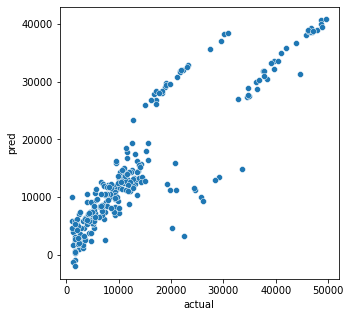

In [94]:
# 산점도 그리기
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'actual', y='pred', data=comparison)

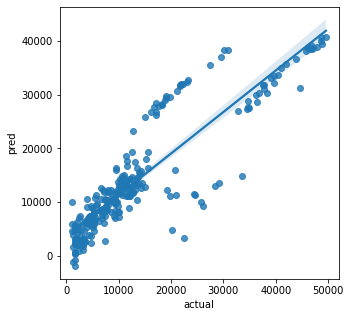

In [95]:
plt.figure(figsize=(5, 5))
sns.regplot(x = 'actual', y='pred', data=comparison)
plt.show()

### RMSE & R²(결정계수)
> 회귀 -> 연속형 변수를 예측할 때 쓰임 -> 값들의 나열 -> 예측값-실제값 사이의 차이 = 오차, 이 오차들을 기준으로 모델의 성능이 결정

|평가지표|설명|
|-|-|
|MAE (Mean Absolute Error, 평균 절대 오차)|- 실젯값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|MSE (Mean Squared Error, 평균 제곱 오차)|- 실젯값과 예측값 사이의 오차를  제곱한 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|RMSE (Root Mean Squared Error, 루트 평균 제곱 오차)<br>|- MSE에 루트를 씌운 값<br>- 0에 가까울수록 좋음<br>- 연속형 변수를 예측할 때 가장 일반적으로 사용되는 평가지표|
|R²|- 결정계수<br>- 독립변수가 종속변수를 얼마만큼 설명해 주는지 나타내는 지표, 즉 설명력<br>- 1에 가까울수록 좋음|

#mean_squared_error()

In [96]:
from sklearn.metrics import mean_squared_error # 평가지표 불러오기

In [97]:
# mse -> 실제값, 예측값
# MSE
mean_squared_error(y_test, pred)
# 모델 간 비교 (다른 알고리즘, 다른 독립변수 조합)

30685749.465737995

In [98]:
# rmse
mean_squared_error(y_test, pred)  ** 0.5  # 루트 씌워주기 ( ** (거듭제곱 연산))

5539.471948276117

In [99]:
# rmse #2
# mean_squared_error(y_test, pred, squared=True) # default 값
mean_squared_error(y_test, pred, squared=False)

5539.471948276117

$R^2 = \frac{SSR}{SST}$<br>
* **SST** (Sum of Squares Total) : 총변동
* **SSR** (Sum of Squares Regression) : 설명 가능한 변동
* **SSE** : 설명이 안되는 변동
* 모델이 얼마나 값의 변동을 잘 설명하는가? = 예측을 잘하는가?
* https://m.blog.naver.com/pmw9440/221822183325

In [101]:
# 학습시킨 독립변수, 종속변수
# R²
model.score(X_train, y_train)

0.738684866864797

## 선형회귀 `Linear Regression`
* 독립변수와 종속변수 간에 선형 관계가 있음을 가정하여 최적의 선을 그려서 예측하는 방법
* 머신러닝에서는 손실(오차)함수 `Loss Function` 를 최소화하는 선을 찾아서 모델을 만들어냄
* 수식을 도출하기에 매우 쉽게 때문에 그 해석도 직관적
    * 회귀 직선의 수식에 관련된 값을 제공

In [102]:
import numpy as np

In [103]:
# 독립변수별 계수 확인
model.coef_   # 각 독립변수가 단위별로 얼마나 y값에 영향을 미치는지

array([  248.0747473 ,   341.05047148,   567.28152844, 23717.79639542,
        -155.82367665,  -159.17943468,  -640.6454047 ,  -951.25416336])

In [104]:
pd.Series(model.coef_, index=X.columns)

age                  248.07
bmi                  341.05
children             567.28
smoker             23717.80
sex_male            -155.82
region_northwest    -159.18
region_southeast    -640.65
region_southwest    -951.25
dtype: float64

In [105]:
model.intercept_   # 모든게 0일 때 기본값

-11764.909073858327

$261.94 × age + 339.54 × bmi + 607.58 × children + 23878.00 × smoker + 42.42× sex male + (-394.02) × region northwest + (-1073.15) × region southeast + (-973.02) × region southwest -12258.305052625143$

---
* 값은 바뀐다. 위위 Series 확인해서
age == 248.07
bmi == 341.05
...

* 모델의 계수를 해석할 때 '부호'의 영향에 유의
* 부호와 상관없이 **계수의 절대값이 클수록 영향이 크다**라고 할 수 있고, 절대값이 0에 가까울 수록 영향력이 거의 없음
* 여러 계수를 서로 비교할 때, 단순히 절댓값이 더 크면 영향이 크다? -> 각 변수의 스케일(단위)
* 이 부분을 명료하게 (확실하게) 스케일링 작업

## 모델 배포
* 모델 -> pkl 확장자 -> 배포

In [106]:
!pip install mlxtend -q

In [107]:
import joblib # pkl 세이브파일을 만들어주는 라이브러리

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [108]:
from google.colab import files

files.download('first_model.pkl') # 다운로드

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
model_from_joblib = joblib.load('first_model.pkl')
model_from_joblib

LinearRegression()

In [110]:
pd.Series(model_from_joblib.coef_, index = X.columns)

age                  248.07
bmi                  341.05
children             567.28
smoker             23717.80
sex_male            -155.82
region_northwest    -159.18
region_southeast    -640.65
region_southwest    -951.25
dtype: float64